In [1]:
using Plots

In [25]:
N = 500
interval = (0, 2pi)
L = interval[2] - interval[1]

#Assign sub-intervals
x = range(interval[1], stop = interval[2], length = N);

#Define function (in this case, cos(x)) and evaluate it along discretized interval
func = round.(4*(cos.(2*x)).^3,digits=8)

#Check to see that the periodic condition holds
func[1] == func[length(func)] ? println("Periodic") : println("Non-Periodic")

Periodic


In [26]:
#Task One: Output Fourier coefficients

Δx = L/(N-1)
yhat = []

for j in 1:N
    sum = 0
    for m in 1:(N)
        iteration = exp((-2*im*j*pi/L)*x[m])*func[m]
        sum += iteration
    end
    append!(yhat, round.((Δx/L)*(sum - func[1]), digits=8))
end

In [27]:
#Print non-zero (real or imaginary) coefficients and their index

for i in 1:length(yhat)
    if real(yhat[i]) != 0
        println("REAL --- Index: ", i, " Coefficient: ", real(yhat[i]))
    end
    
    if imag(yhat[i]) != 0
        println("Imaginary --- Index: ", i, " Coefficient: ", imag(yhat[i]))
    end
end

REAL --- Index: 2 Coefficient: 1.5
REAL --- Index: 6 Coefficient: 0.5
REAL --- Index: 493 Coefficient: 0.5
REAL --- Index: 497 Coefficient: 1.5


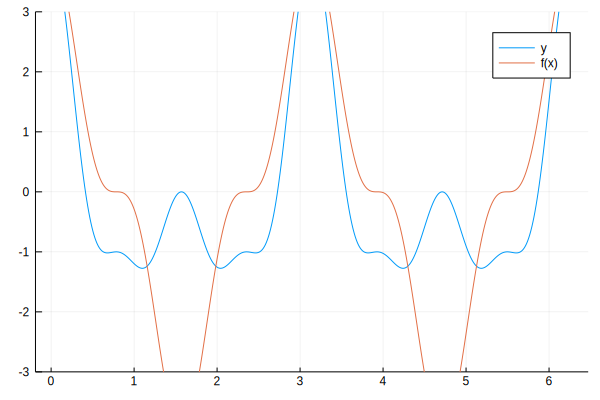

In [28]:
#Task Two: Convert Fourier coefficients into approximate y values

z = []

for i in 1:N
    if i < (N-i+1) 
        #Convert from cn to an and bn and evaluate cos(nk) and sin(nk) at each sub-interval
        append!(z,[((real(yhat[i]))+(real(yhat[N-i + 1])))*cos.((2*pi*i*x)/L)+((imag(yhat[i]))+(imag(yhat[N-i + 1])))*sin.((2*pi*i*x)/L)]) 
    end
    
    #Include c0 conversion
    if N % 2 == 1
        if i === (N-i+1)
            a0 = fill(real(yhat[Int((N+1)/2)]),length(x))
            append!(z,[a0])
        end 
    end
end

#Sum N Fourier terms evaluated at each sub-interval 
y = sum(z)

plot(x,y, ylim=(-3,3), label="y")
plot!(x,func, label="f(x)")

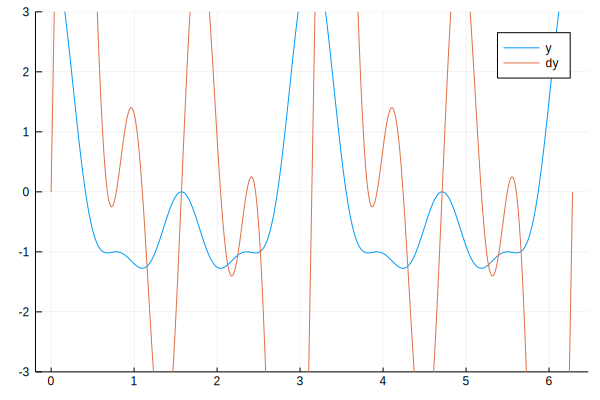

In [29]:
#Task Three: Obtain derivative of approximated function

q = []

#Multiply imaginary term through ŷ such that we can perform the same conversion done in the last cell, but now on iŷ
iyhat = im*yhat

for j in 1:N
    if j < (N-j+1)
        append!(q,[((2*pi*j)/L)*(((real(iyhat[j]))+(real(iyhat[N-j + 1])))*cos.((2*pi*j*x)/L)+((imag(iyhat[j]))+(imag(iyhat[N-j + 1])))*sin.((2*pi*j*x)/L))])
    end
end

dy = sum(q)

plot(x,y,ylim=(-3,3), label="y")
plot!(x,dy, label="dy")

In [30]:
#Print non-zero (real or imaginary) coefficients and their index

for i in 1:length(iyhat)
    if real(iyhat[i]) != 0
        println("REAL --- Index: ", i, " Coefficient: ", real(iyhat[i]))
    end
    
    if imag(iyhat[i]) != 0
        println("Imaginary --- Index: ", i, " Coefficient: ", imag(iyhat[i]))
    end
end

Imaginary --- Index: 2 Coefficient: 1.5
Imaginary --- Index: 6 Coefficient: 0.5
Imaginary --- Index: 493 Coefficient: 0.5
Imaginary --- Index: 497 Coefficient: 1.5
